In [1]:
import tensorflow as tf

x = tf.Variable(0., name="x")
threshold = tf.constant(5.)

model = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(model)
    while session.run(tf.less(x, threshold)):
        x += 1
        x_value = session.run(x)
        print(x_value)

1.0
2.0
3.0
4.0
5.0


Predicted model: 2.052x + 5.669


/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


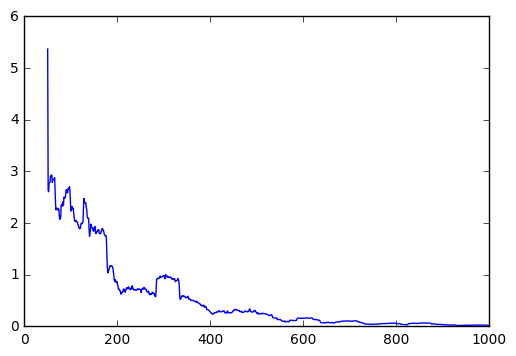

In [2]:
import tensorflow as tf
import numpy as np

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable([1.0, 2.0], name="w")
y_model = tf.mul(x, w[0]) + w[1]
error = tf.square(y - y_model)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)
model = tf.initialize_all_variables()

errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        errors.append(error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))
    
import matplotlib.pyplot as plt

plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()
plt.savefig("errors.png")